# **Step 1: Data Collection & Preperation**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

In [ ]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

Saving index.csv to index.csv


In [ ]:
# Read CSV
data = pd.read_csv('index.csv')

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


**Data Cleaning**

In [ ]:
# Check for Missing Values
data.isnull().sum()                                                    # 'card' column has 89 null values
data[data['card'].isnull()]

# Fill the NaN values of 'card' column
data['card'].fillna('CASH_CUSTOMER', inplace=True)
data[data['card'] == 'CASH_CUSTOMER']

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,CASH_CUSTOMER,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,CASH_CUSTOMER,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,CASH_CUSTOMER,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,CASH_CUSTOMER,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,CASH_CUSTOMER,40.0,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,CASH_CUSTOMER,39.0,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,CASH_CUSTOMER,39.0,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,CASH_CUSTOMER,34.0,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,CASH_CUSTOMER,34.0,Americano with Milk


**Feature Engineering**

In [ ]:
# Converting 'date' & 'datetime' column to DateTime format
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

# Extract useful features
data['Month'] = data['date'].dt.to_period('M')
data['Weekday'] = data['date'].dt.day_name()
data['is_weekend'] = data['date'].dt.weekday >= 5
data['Hour'] = data['datetime'].dt.hour
data.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'Month', 'Weekday', 'is_weekend', 'Hour'],
      dtype='object')

In [ ]:
data['Weekday'].head()                             # Check for newly added columns
data['is_weekend'].head()

# Check for duplicates
data.duplicated().sum().item()                        # 0 duplicates! that's cool

# Unique values of features
print(data['coffee_name'].value_counts())
print('\n')
print(data['cash_type'].value_counts())

coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


cash_type
card    1044
cash      89
Name: count, dtype: int64


# **Step 2: Exploratory Data Analysis (EDA)**

*1) Total sales over time*

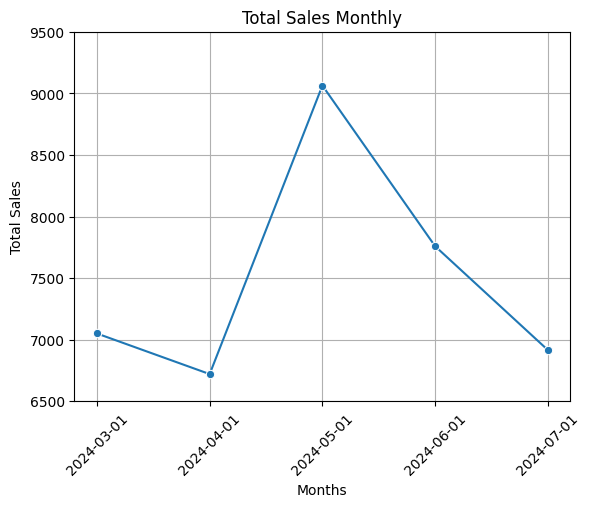

In [ ]:
monthly_sales = data.groupby('Month')['money'].sum().reset_index()
data['Month'] = data['Month'].astype(str)

sns.lineplot(data=monthly_sales, x='Month', y='money', marker='o')

plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.ylim(6500,9501)

plt.title('Total Sales Monthly')
plt.grid()
plt.show()

*2) Total Orders and Quantity Over Time*

Since 'Quantity' column is missing lets assume each order has '1' (An example of real-world scenario)

`[here you will get a straight line for 'Quantity']`

In [ ]:
# data['Quantity'] = 1

# # Total orders and total quantity monthly
# orders_qty = data.groupby('Month').agg({
#     'money':'sum',
#     'Quantity':'sum'
# }).reset_index()

# # Renaming columns for better visualization
# orders_qty.columns = ['Month','Total_Sales','Total_orders']
# orders_qty.columns                                 # Index(['Month', 'Total_Sales', 'Total_orders'], dtype='object')

# orders_qty.plot(x='Month',y=['Total_Sales','Total_orders'],kind='line',figsize=(12,6))

# plt.title("Total Sales and Orders Over Time")
# plt.xticks(rotation=45)
# plt.show()

*3) Sales patterns: Weekdays vs Weekends*

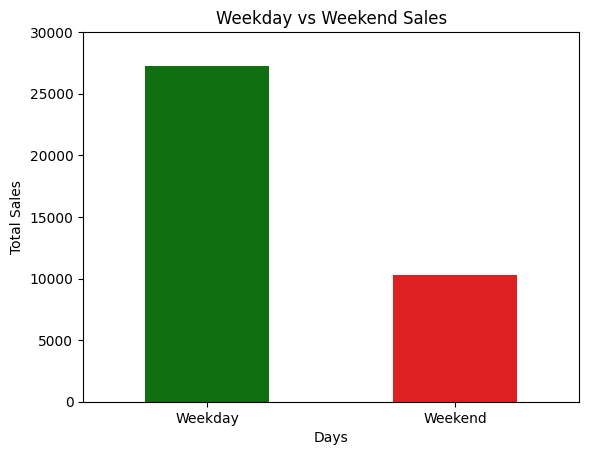

In [ ]:
Weekday_sales = data.groupby(['is_weekend'])['money'].sum().reset_index()
Weekday_sales['is_weekend'] = Weekday_sales['is_weekend'].map({False : 'Weekday',True: 'Weekend'})

sns.barplot(data=Weekday_sales, x='is_weekend', y='money',palette=['Green','Red'], hue='is_weekend',width=0.5)

plt.xlabel('Days')
plt.ylabel('Total Sales')
plt.ylim(0,30001)

plt.title('Weekday vs Weekend Sales')
plt.show()

*4) Daily Sales vs Average Sales*

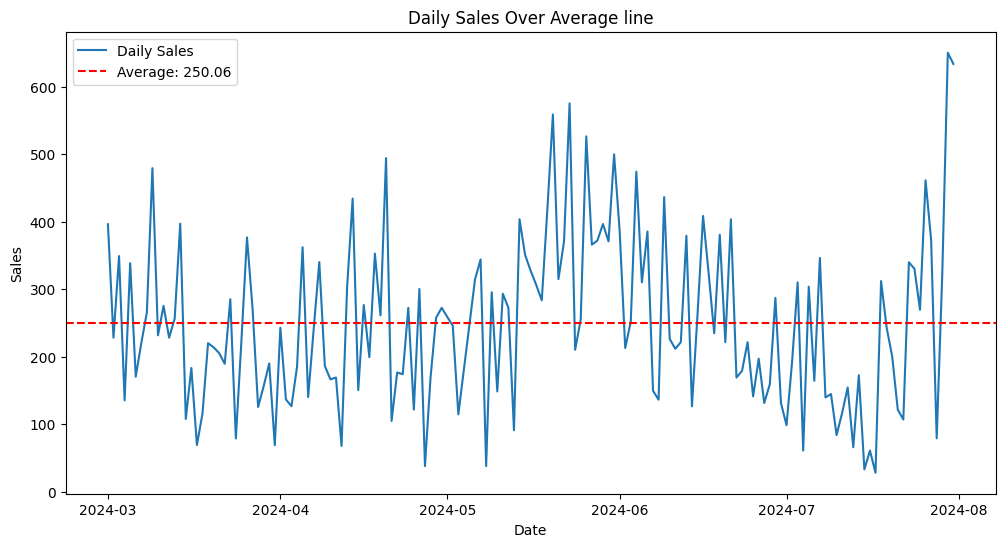

In [ ]:
plt.figure(figsize=(12,6))
daily_sales = data.groupby('date')['money'].sum().reset_index()            # Total sales per day
avg_sales = daily_sales['money'].mean()                                    # Avg sales - (mean of total sales of each day)

sns.lineplot(data=daily_sales, x='date', y='money',label='Daily Sales')
plt.axhline(avg_sales, color='r', linestyle='--', label=f'Average: {avg_sales:.2f}')            # Straight line to determine average sale

plt.xlabel('Date')
plt.ylabel('Sales')

plt.title('Daily Sales Over Average line')
plt.legend()
plt.show()

*5) Total sales by product category (coffee_name)*

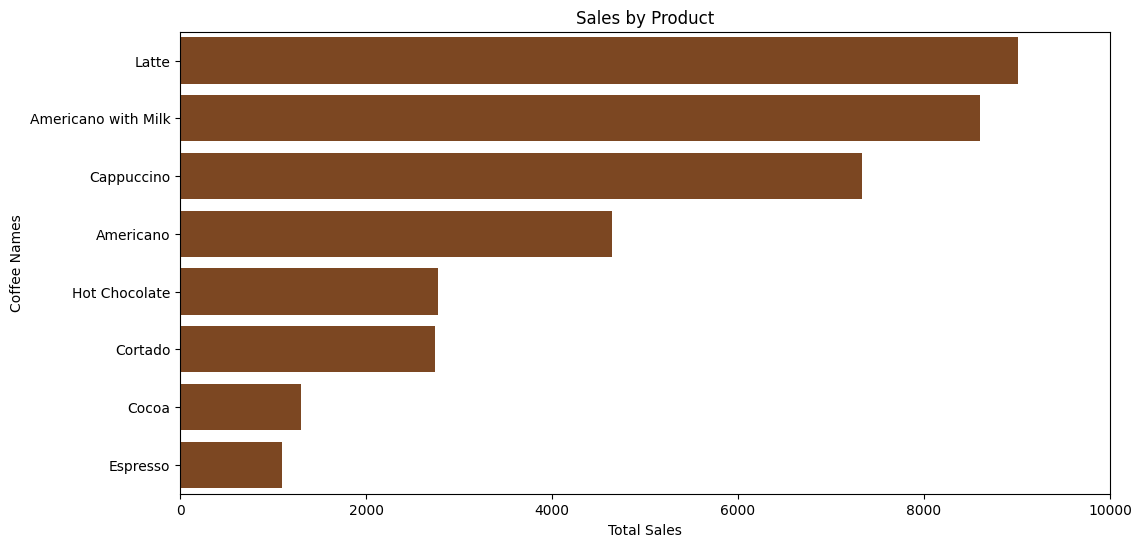

In [ ]:
plt.figure(figsize=(12,6))
Category_sales = data.groupby('coffee_name')['money'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data=Category_sales, x='money', y='coffee_name', color='#8B4513')

plt.xlabel('Total Sales')
plt.ylabel('Coffee Names')

plt.xlim(0,10001)

plt.title('Sales by Product')
plt.show()

*6) Sales by Hour & Week Day*

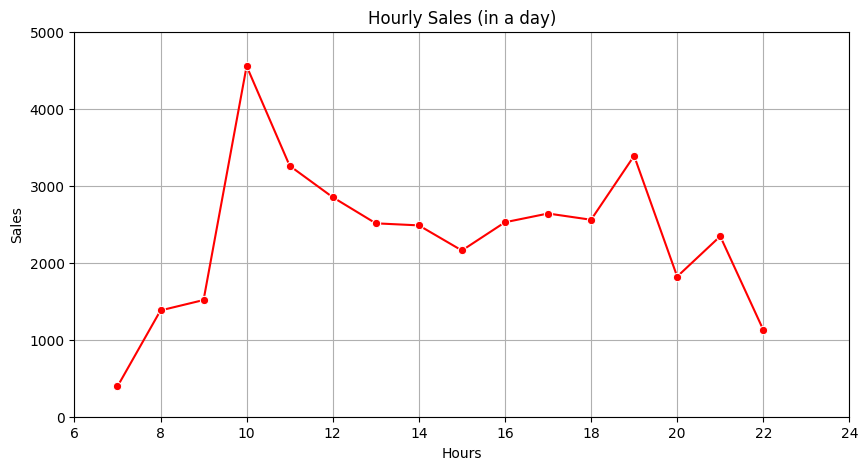

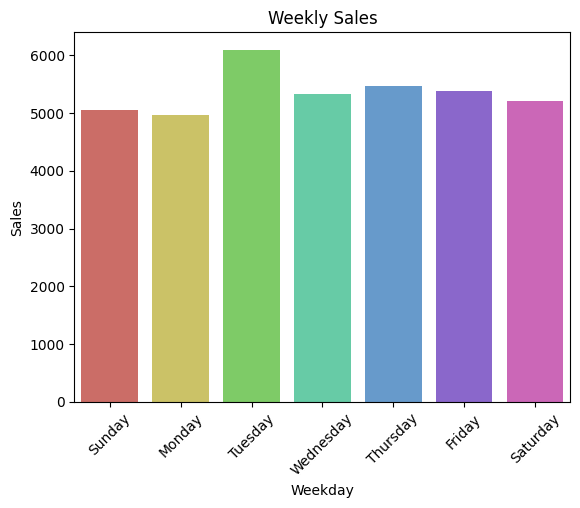

In [ ]:
# Sales by Hour
plt.figure(figsize=(10,5))
Hourly_sales = data.groupby('Hour')['money'].sum().reset_index()

sns.lineplot(data=Hourly_sales, x='Hour', y='money', marker='o',color='r')

plt.xlim(6,24)
plt.ylim(0,5000)

plt.xlabel('Hours')
plt.ylabel('Sales')

plt.title('Hourly Sales (in a day)')
plt.grid()
plt.show()

# Sales by Weekday
Weekday_sales = data.groupby('Weekday')['money'].sum().reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']).reset_index()

sns.barplot(data=Weekday_sales, x='Weekday', y='money',palette='hls', hue='Weekday')

plt.xlabel('Weekday')
plt.ylabel('Sales')

plt.xticks(rotation=45)

plt.title('Weekly Sales')
plt.show()

# **Step 3: Removing Outliers (if needed)**

Outliers can distort the model accuracy especially in regression, we will use Z-Score for outlier detection for numerical column such as `money`

In [ ]:
# Cloning dataset (to keep original untouched)
data2 = data

# Computing Z-Score for 'money' column
z_score = zscore(data2[['money']])
abs_z_scores = np.abs(z_score)


# Keep only rows where Z-score < 3
data2 = data2[(abs_z_scores < 3).all(axis=1)]

# Confirm shape
print('Data Shape after outlier removal',data2.shape)         # No Outliers were Found

Data Shape after outlier removal (1133, 11)


# **Step 4: Model Training**

In [ ]:
data.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'Month', 'Weekday', 'is_weekend', 'Hour', 'Quantity'],
      dtype='object')

In [ ]:
# Dependent variable
X = data.drop(columns=['money', 'datetime', 'card', 'date'])

# Target Variable (Independent Variable)
y = data['money']

# One-hot Encoding categorical columns (variables)
X = pd.get_dummies(X, drop_first=True)

# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)       # 20% test 80% train

# Create Object for Model
lr = LinearRegression()

# Train Model
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.63
R² Score: 0.98


# **Step 5: Model Interpretation**

In [ ]:
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
print(coefficients.head())

                           Coefficient
coffee_name_Cappuccino        9.856154
coffee_name_Cocoa             9.722665
coffee_name_Hot Chocolate     9.703756
coffee_name_Latte             9.689614
Month_2024-07-01             -5.225715


**Key Results:**

| Feature                     | Coefficient | Interpretation                                                                                     |
| --------------------------- | ----------- | -------------------------------------------------------------------------------------------------- |
| `coffee_name_Cappuccino`    | **+9.86**   | Cappuccino adds ₹9.86 to average sales per transaction.                                            |
| `coffee_name_Cocoa`         | **+9.72**   | Cocoa contributes ₹9.72 more per sale.                                                             |
| `coffee_name_Hot Chocolate` | **+9.70**   | Similar impact as Cocoa.                                                                           |
| `coffee_name_Latte`         | **+9.68**   | Lattes also increase transaction value significantly.                                              |
| `Month_2024-07-01`          | **−5.22**   | Sales in **July** were ₹5.22 **lower than the base month**  |



---

Cappuccino, Cocoa, Hot Chocolate, and Latte are our highest value products!!

Sales in July dropped compared to the base month, this could signal seasonality, customer drop-off, or marketing impact


# **Conclusion Summary**


This coffee sales analysis project offered a comprehensive exploration of transaction data from a vending machine from March to July 2024, with the aim of uncovering patterns that can help improve overall sales performance. By conducting extensive data cleaning and feature engineering, followed by structured exploratory data analysis, we were able to identify critical trends in customer behavior and product performance. The analysis revealed that high-revenue items such as Cappuccino, Cocoa, Hot Chocolate, and Latte significantly contribute to overall sales, making them strategic products to prioritize for inventory and marketing efforts. Time-based patterns further enriched these findings: mid-morning and early evening hours emerged as peak sales periods, and weekday transactions outpaced those on weekends, indicating a more engaged customer base during the standard workweek. Additionally, sales performance varied across months, with a notable dip observed in July compared to earlier months suggesting either seasonal fluctuations or shifts in customer demand that may require intervention. To quantify these relationships, a linear regression model was trained using a clean, feature-rich dataset. The model achieved a high R² score of 0.98 and a very low mean squared error, demonstrating strong predictive capability. These results confirm that factors such as time of day, weekday versus weekend, and product choice are highly influential in determining transaction value. Overall, this project not only deepens our understanding of the business's sales dynamics but also provides a strong foundation for data-driven decision-making around stock management, product placement, and promotional timing.